Data Mining: Basic Concepts - WS'19/20 
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Dr. Johannes Fuchs, Eren Cakmak, Frederik Dennig
```

---

#### Exercise 1: Naïve Bayes Classification - _(8 Points)_

|MsgID|TimeZone|GeoLocation|SuspiciousSubject|SuspiciousBody|Spam|
|-----|--------|-----------|-----------------|--------------|----|
|1|US|US|No|Yes|No|
|2|US|US|No|No|No|
|3|EU|US|No|Yes|Yes|
|4|AS|EU|No|Yes|Yes|
|5|AS|AS|Yes|Yes|Yes|
|6|AS|AS|Yes|No|No|
|7|EU|AS|Yes|No|Yes|
|8|US|EU|No|Yes|No|
|9|US|AS|Yes|Yes|Yes|
|10|AS|EU|Yes|Yes|Yes|
|11|US|EU|Yes|No|Yes|
|12|EU|EU|No|No|Yes|
|13|EU|US|Yes|Yes|Yes|
|14|AS|EU|No|No|No|

* EU = Europe; US = United States; AS = Asia

##### __(a) According to the lecture slides, a Naïve Bayes Classifier assumes class conditional independence. Explain what this means and why that might be a problem__

> In the _naive bayes classifier_ it is assumed that the attribute values  
> are independent of eachother given the class. This is problematic, since this  
> is often _not_ given.  
> One could use a bayesian belief network if the assumption is not given, even though  
> there are further information needed (i.e. link of relations).

##### __(b) Calculate all conditional probabilities of a  Naïve Bayes Classifier with the given data by hand.__

<img src='Graphs/Ass02_NaiveBayes_I.jpg' alt='Calculations: Ass02_NaiveBayes_I.jpg' width='650'/>

##### __(c)	Calculate the posterior probabilities and classify the following three E-Mails by means of the trained classifier:__
    a. E-mail A = (US, US, Yes, Yes)
    b. E-mail B = (Asia, Asia, No, No)
    c. E-mail C = (EU, Asia, No, Yes)


<img src='Graphs/Ass02_NaiveBayes_II.jpg' alt='Calculations: Ass02_NaiveBayes_II.jpg' width='850'/>

##### __(d)The output of a naïve bayes classifier includes the assigned class as well as the probability that the assignment is correct. Give one reason why this could be an advantage over classifiers that only return the assigned class but no probability.__

> Not only does it allow the classification but also gives the chance  
> to report uncertainty. This could be usefull for example if one wants  
> to manually check data that is classified within a certain threshold  
> of uncertainty.

---

#### Exercise 2: Pruning Decision Trees  - _(8 Points)_

__We will investigate the “diabetes.csv” dataset. Read the “description.txt” to understand the individual columns. Use the already imported libraries for this exercise.__

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree

##### __(a) Load the dataset and use a sampling method to split the dataset into a training (80% rows) and test (20% rows) dataset. The target column is the last column.__
_(Hint: use the `sklearn.model_selection.train_test_split` and set the parameter to `random_state = 0`)_

In [2]:
df = pd.read_csv('Data/diabetes.csv', names=['pregnant',
                                             'glucose',
                                             'blood',
                                             'skin',
                                             'insulin',
                                             'bmi',
                                             'pedigree',
                                             'age',
                                             'class'])
print(df.info(),'\n')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
blood       768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
class       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None 

   pregnant  glucose  blood  skin  insulin   bmi  pedigree  age  class
0         6      148     72    35        0  33.6     0.627   50      1
1         1       85     66    29        0  26.6     0.351   31      0
2         8      183     64     0        0  23.3     0.672   32      1
3         1       89     66    23       94  28.1     0.167   21      0
4         0      137     40    35      168  43.1     2.288   33      1


In [3]:
df_train, df_test = train_test_split(df,
                                     train_size=0.8,
                                     test_size=0.2,
                                     random_state=0)

print(df_train.head(), '\n', df_train.shape, '\n')
print(df_test.head(), '\n', df_test.shape)

     pregnant  glucose  blood  skin  insulin   bmi  pedigree  age  class
603         7      150     78    29      126  35.2     0.692   54      1
118         4       97     60    23        0  28.2     0.443   22      0
247         0      165     90    33      680  52.3     0.427   23      0
157         1      109     56    21      135  25.2     0.833   23      0
468         8      120      0     0        0  30.0     0.183   38      1 
 (614, 9) 

     pregnant  glucose  blood  skin  insulin   bmi  pedigree  age  class
661         1      199     76    43        0  42.9     1.394   22      1
122         2      107     74    30      100  33.6     0.404   23      0
113         4       76     62     0        0  34.0     0.391   25      0
14          5      166     72    19      175  25.8     0.587   51      1
529         0      111     65     0        0  24.6     0.660   31      0 
 (154, 9)


In [4]:
df_train_class = df_train['class']
df_train = df_train.drop(['class'], axis=1)

df_test_class = df_test['class']
df_test = df_test.drop(['class'], axis=1)

##### __(b) Use the training dataset to train a decision tree. Plot the tree.__

In [5]:
clf = tree.DecisionTreeClassifier('entropy', random_state=0)
clf = clf.fit(df_train, df_train_class)

tree.plot_tree(clf)



[Text(205.89166666666665, 359.3333333333333, 'X[1] <= 123.5\nentropy = 0.943\nsamples = 614\nvalue = [393, 221]'),
 Text(55.62777777777778, 338.79999999999995, 'X[5] <= 26.45\nentropy = 0.69\nsamples = 352\nvalue = [287, 65]'),
 Text(11.022222222222222, 318.26666666666665, 'X[6] <= 0.675\nentropy = 0.083\nsamples = 97\nvalue = [96, 1]'),
 Text(5.511111111111111, 297.7333333333333, 'entropy = 0.0\nsamples = 79\nvalue = [79, 0]'),
 Text(16.53333333333333, 297.7333333333333, 'X[6] <= 0.705\nentropy = 0.31\nsamples = 18\nvalue = [17, 1]'),
 Text(11.022222222222222, 277.2, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(22.044444444444444, 277.2, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(100.23333333333333, 318.26666666666665, 'X[7] <= 28.5\nentropy = 0.813\nsamples = 255\nvalue = [191, 64]'),
 Text(49.6, 297.7333333333333, 'X[5] <= 30.95\nentropy = 0.549\nsamples = 134\nvalue = [117, 17]'),
 Text(33.06666666666666, 277.2, 'X[0] <= 7.0\nentropy = 0.162\nsamples = 42\nvalue

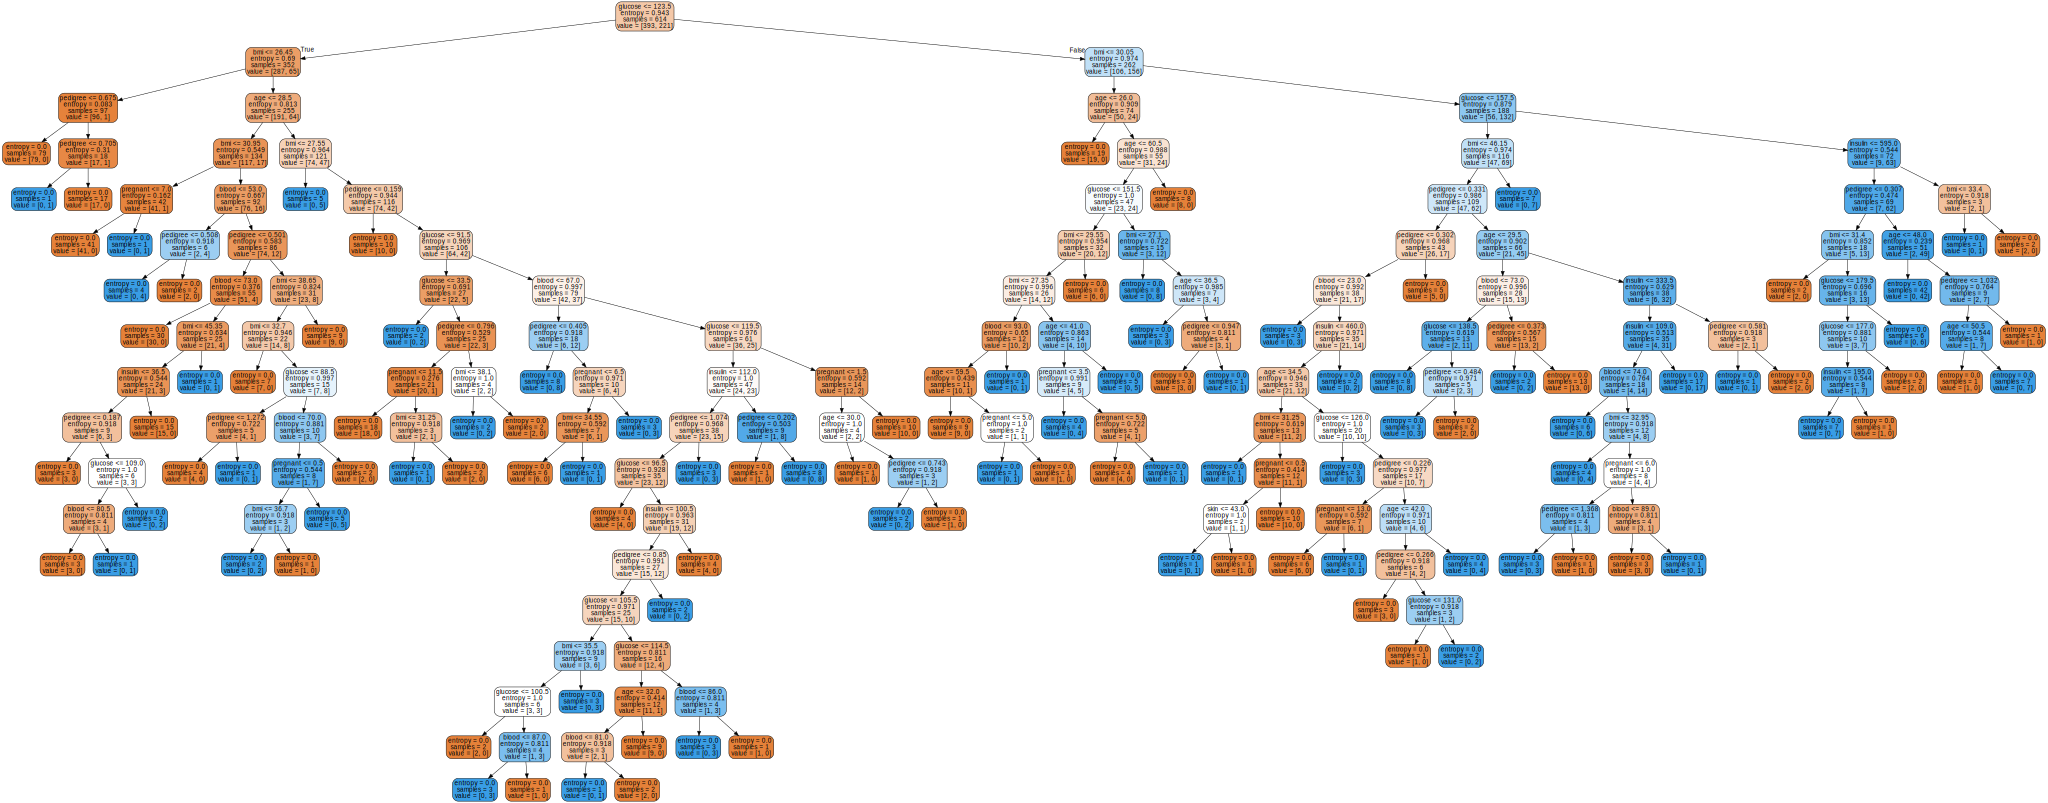

In [6]:
## More beautiful:
import graphviz
tree_data = tree.export_graphviz(clf,
                                 feature_names=list(df_train),
                                 filled=True,
                                 rounded=True)
graph = graphviz.Source(tree_data)
graph

##### __(c)	Measure the accuracy of the decision tree on the training and test dataset. The accuracy is one metric for evaluating classification models. `Accuracy = (number of correct predictions) / (total number of predictions)`.__ 
_(Hint: use the `DecisionTreeClassifier.score` method)_

In [7]:
clf.score(df_test, df_test_class)

0.7077922077922078

##### __(d) Use prepruning and train a new decision tree. Use the `max_depth=7` parameter for the `DecisionTreeClassifier`. Plot the pruned decision tree.__

[Text(134.443125, 203.85, 'X[1] <= 123.5\nentropy = 0.943\nsamples = 614\nvalue = [393, 221]'),
 Text(45.68625, 176.67000000000002, 'X[5] <= 26.45\nentropy = 0.69\nsamples = 352\nvalue = [287, 65]'),
 Text(11.16, 149.49, 'X[6] <= 0.675\nentropy = 0.083\nsamples = 97\nvalue = [96, 1]'),
 Text(5.58, 122.31, 'entropy = 0.0\nsamples = 79\nvalue = [79, 0]'),
 Text(16.740000000000002, 122.31, 'X[6] <= 0.705\nentropy = 0.31\nsamples = 18\nvalue = [17, 1]'),
 Text(11.16, 95.13, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(22.32, 95.13, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(80.2125, 149.49, 'X[7] <= 28.5\nentropy = 0.813\nsamples = 255\nvalue = [191, 64]'),
 Text(48.825, 122.31, 'X[5] <= 30.95\nentropy = 0.549\nsamples = 134\nvalue = [117, 17]'),
 Text(33.480000000000004, 95.13, 'X[0] <= 7.0\nentropy = 0.162\nsamples = 42\nvalue = [41, 1]'),
 Text(27.9, 67.94999999999999, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0]'),
 Text(39.06, 67.94999999999999, 'entropy = 0.0\nsa

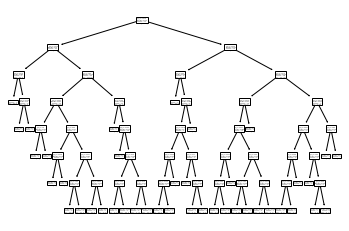

In [8]:
clf_pruned = tree.DecisionTreeClassifier('entropy', max_depth=7, random_state=0)
clf_pruned = clf_pruned.fit(df_train, df_train_class)

tree.plot_tree(clf_pruned)

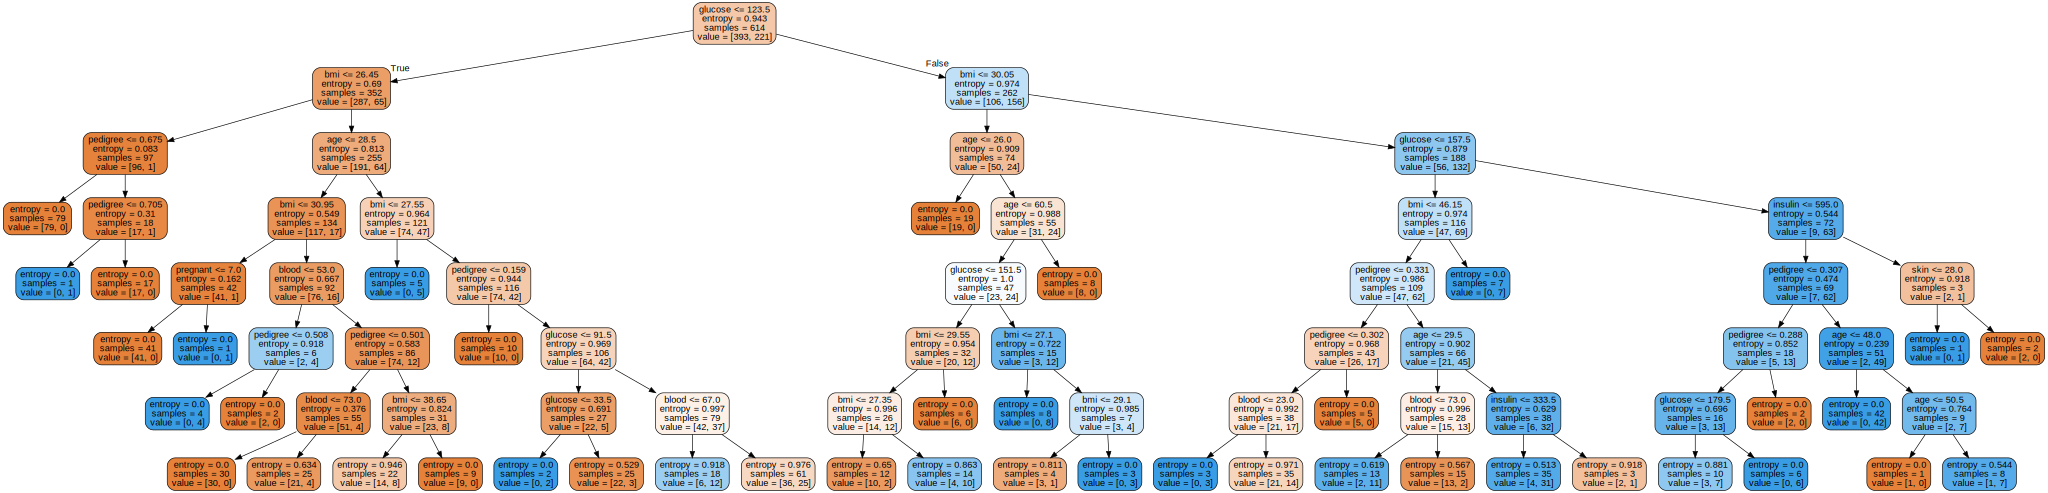

In [9]:
## More beautiful:
import graphviz
tree_data = tree.export_graphviz(clf_pruned,
                                 feature_names=list(df_train),
                                 filled=True,
                                 rounded=True)
graph = graphviz.Source(tree_data)
graph

##### __(e) Measure the accuracy of the pruned decision tree on the training and test dataset.__

In [10]:
clf_pruned.score(df_test, df_test_class)

0.7207792207792207

##### __(f) Explain and discuss the results from c) and e).__

> In the first tree, the depth is defined by how many splits are needed  
> in order to create pure classes only. By limiting the tree beforehand  
> to a depth of seven, the tree is reduced or _'pruned'_.  
>  
> _Accuracy_ is measured as a percentage score of correctly classified data  
> that is already labelled but used a test with the trained model.  
> In this special case (random_state=0), the pruned tree performs even  
> better than the full tree, clearly demonstrating the concept of **overfitting**.  
> (`acc_pur` = 0.721 > `acc`= 0.701)
>
> In this, the tree is so close to training data that it does not depict  
> an optimal model for real new data, simulated by the test-data.

---

#### Exercise 3: Naïve Bayes Classification - _(4 Points)_

__In this exercise we will use the Naïve Bayes classification methods on a real data set. We will classify the digits dataset (see https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)__

<Figure size 432x288 with 0 Axes>

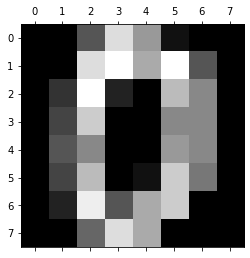

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

## example plot of one of the digits
import matplotlib.pyplot as plt 
plt.gray()
plt.matshow(digits.images[0]) 
plt.show() 

##### __(a) Split the dataset into a training (80% rows) and test (20% rows) data. The data column is `digits.data`and the target column `digits.target`.__
_(Hint: use the `sklearn.model_selection.train_test_split` and set the parameter to `random_state = 0`)_

In [12]:
import sklearn.model_selection as model_selection

train_data, test_data, train_target, test_target = model_selection.train_test_split(digits.data,
                                                                                    digits.target,
                                                                                    test_size=0.2,
                                                                                    random_state=0)

##### __(b) Generate a model and fit the dataset on the classifier.__ 
_(Hint: use already implemented version in `sklearn.naive_bayes.GaussianNB`)_

In [13]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(train_data, train_target)

GaussianNB(priors=None, var_smoothing=1e-09)

##### __(c) Compute the accuracy on the train and test data using the trained model.__ 
_(Hint: use already the `GaussianNB.predict` and `sklearn.metrics.accuracy_score` method for this)_

In [14]:
from sklearn import metrics

clf_predict = GaussianNB.predict(clf, test_data)
metrics.accuracy_score(test_target, clf_predict)

0.825